In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [3]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/kaggle/input/pothole-detection-dataset/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

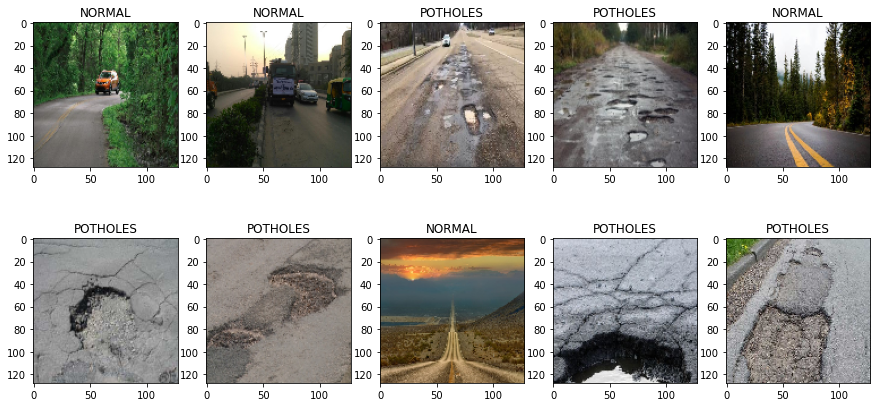

In [4]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [7]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/30
43/43 - 11s - loss: 3.9146 - accuracy: 0.5275 - val_loss: 0.6195 - val_accuracy: 0.6353
Epoch 2/30
43/43 - 11s - loss: 0.6346 - accuracy: 0.6020 - val_loss: 0.5586 - val_accuracy: 0.7588
Epoch 3/30
43/43 - 10s - loss: 0.6313 - accuracy: 0.6373 - val_loss: 0.5519 - val_accuracy: 0.6706
Epoch 4/30
43/43 - 10s - loss: 0.4683 - accuracy: 0.7765 - val_loss: 0.7983 - val_accuracy: 0.6294
Epoch 5/30
43/43 - 11s - loss: 0.6507 - accuracy: 0.6471 - val_loss: 0.4162 - val_accuracy: 0.8353
Epoch 6/30
43/43 - 10s - loss: 0.5709 - accuracy: 0.7235 - val_loss: 0.4647 - val_accuracy: 0.8059
Epoch 7/30


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

In [ ]:
# Making predictions on test data
prediction = model.predict(x_test)

In [ ]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [ ]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)  

In [ ]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])